# Notebook: Demonstration of PyMuPDF's new Table Feature
This Jupyter notebook demonstrates the use of PyMuPDF's table recognition and extraction features.

For a short and appealing presentation of the topic we use the following Python packages beyond PyMuPDF itself. Please note that they are not required to use the table feature itself.

* [matplotlib](https://pypi.org/project/matplotlib/)
* [pandas](https://pypi.org/project/pandas/)

For ease of use, here are instructions for installing required packages, in case your local configuration is not complete. Just un-comment the respective line before using "Run All".

In [1]:
# un-comment any of the following:
#!python -m pip install pymupdf
#!python -m pip install matplotlib
#!python -m pip install pandas
#!python -m pip install numpy

The following function is used for display PyMuPDF Pixmaps inline with this notebook. Simply ignore it as you wish.

In [2]:
"""
Utility function for showing images.

Intended to be imported in Jupyter notebooks to display pixmap images.

Invocation: "show_image(item, title)", where item is a PyMuPDF object
which has a "get_pixmap" method, and title is an optional string.

The function executes "item.get_pixmap(dpi=150)" and show the resulting
image.


Dependencies
------------
numpy, matplotlib, pymupdf
"""


def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

In [3]:
import fitz  # import PyMuPDF
if not hasattr(fitz.Page, "find_tables"):
    raise RuntimeError("This PyMuPDF version does not support the table feature")

# Open example document and show the first page
This examples demonstrates that table extraction

* supports CJK fonts (Chinese in this case),
* detects multiple tables on the same page.

We show how to access table data, like the header and text content of the cells. Table and header **_boundary boxes_** are wrapped with green, respectively red borders for purposes of this demonstration.

In [4]:
doc = fitz.open("chinese-table.pdf")
page = doc[0]

Table 0 column names: ['年份', '主体信用\n评级', '涵义', '评级机构', '评级展望'], external: False
Table 1 column names: ['序号', '金融机构名称', '授信总额', '已使用情况', '剩余额度'], external: False


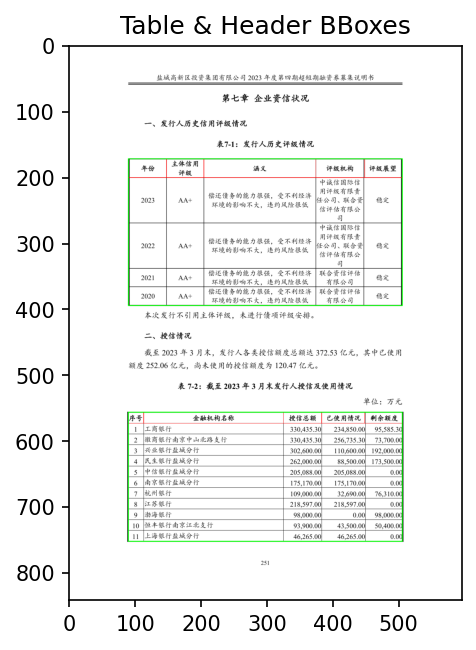

In [13]:
tabs = page.find_tables()  # detect the tables
for i,tab in enumerate(tabs):  # iterate over all tables
    for cell in tab.header.cells:
        page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
    page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
    print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
    
show_image(page, f"Table & Header BBoxes")

Finally let us check, how easy the creation of pandas DataFrames is.

In [7]:
# choose the second table for conversion to a DataFrame
tab = tabs[1]
df = tab.to_pandas()

# show the DataFrame
df

,序号,金融机构名称,授信总额,已使用情况,剩余额度
0,1,工商银行,"330,435.30","234,850.00","95,585.30"
1,2,徽商银行南京中山北路支行,"330,435.30","256,735.30","73,700.00"
2,3,兴业银行盐城分行,"302,600.00","110,600.00","192,000.00"
3,4,民生银行盐城分行,"262,000.00","88,500.00","173,500.00"
4,5,中信银行盐城分行,"205,088.00","205,088.00",0.00
5,6,南京银行盐城分行,"175,170.00","175,170.00",0.00
6,7,杭州银行,"109,000.00","32,690.00","76,310.00"
7,8,江苏银行,"218,597.00","218,597.00",0.00
8,9,渤海银行,"98,000.00",0.00,"98,000.00"
9,10,恒丰银行南京江北支行,"93,900.00","43,500.00","50,400.00"
